# Buğrahan Adalı
#  Numerical Analysis with Python Homework 2

## Question 1

In [ ]:
import numpy as np

# given equations
A = np.array([[4, -1, 1], 
              [1, 3, -1], 
              [1, -1, 4]])
b = np.array([7, 4, 5])

# initial guess
x = np.zeros(3)

# Gauss-Seidel iteration
x_values = [x.copy()]  # To store values of each iteration

for _ in range(3):  # three iterations
    x[0] = (b[0] - (-x[1] + x[2])) / A[0, 0]
    x[1] = (b[1] - (x[0] - x[2])) / A[1, 1]
    x[2] = (b[2] - (x[0] - x[1])) / A[2, 2]
    x_values.append(x.copy())

# results
x_values


[array([0., 0., 0.]),
 array([1.75, 0.75, 1.  ]),
 array([1.6875    , 1.10416667, 1.10416667]),
 array([1.75      , 1.11805556, 1.09201389])]

In [ ]:
# Python implementation
def gauss_seidel(A, b, x0, iterations):
    """
    Perform Gauss-Seidel iterations.
    A: Coefficient matrix
    b: Constants vector
    x0: Initial guess
    iterations: Number of iterations
    """
    n = len(b)
    x = x0.copy()
    for _ in range(iterations):
        for i in range(n):
            sum_ = sum(A[i, j] * x[j] for j in range(n) if j != i)
            x[i] = (b[i] - sum_) / A[i, i]
    return x

# Verify the solution with 3 iterations
x_python = gauss_seidel(A, b, np.zeros(3), 3)
x_python


array([1.75      , 1.11805556, 1.09201389])

## Question 2

In [ ]:
import sympy as sp

# define the variable
x = sp.symbols('x')

# given data points
data_points = [(1, 1), (2, 4), (3, 9)]

# lagrange polynomial
L = 0  # Initialize

for i, (xi, yi) in enumerate(data_points):
    # Lagrange basis polynomial L_i(x)
    Li = 1
    for j, (xj, _) in enumerate(data_points):
        if i != j:
            Li *= (x - xj) / (xi - xj)
    L += yi * Li

# simplify the polynomial
L = sp.simplify(L)

# y @ x = 1.5
y_estimated = L.subs(x, 1.5)

L, y_estimated


(x**2, 2.25000000000000)

## Question 3

In [ ]:
import numpy as np

x_data = np.array([1, 2, 3, 4, 5]) # x values

y_data = np.array([2.2, 2.8, 3.6, 4.5, 5.1]) # y values

X = np.vstack([x_data**2, x_data, np.ones(len(x_data))]).T # design matrix

Y = y_data.reshape(-1, 1) # observed values

coefficients = np.linalg.inv(X.T @ X) @ X.T @ Y # coefficients

coefficients.flatten().round(4) # round to 4 decimal places

array([0.0071, 0.7071, 1.44  ])

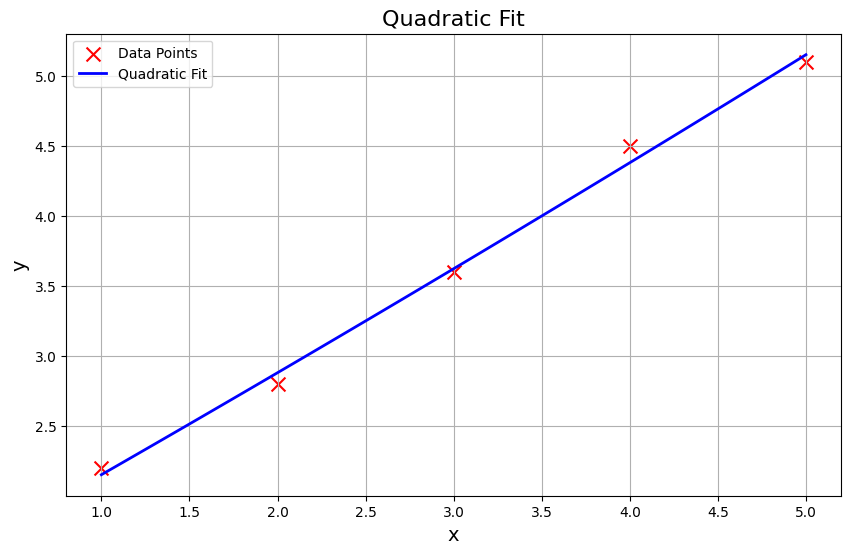

In [17]:
import matplotlib.pyplot as plt

# Generate fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = coefficients[0] * x_fit**2 + coefficients[1] * x_fit + coefficients[2]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label="Data Points", color='red', marker='x', s=100)
plt.plot(x_fit, y_fit, label="Quadratic Fit", color='blue', linestyle='-', linewidth=2)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("Quadratic Fit", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()
